# 6.5 Unsupervised Machine Learning
## Import Libraries and Datasets

In [47]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\liz20\OneDrive\Career Foundry\6. Advanced Analytics & Dashboard Design'

In [14]:
df = pd.read_csv(os.path.join(path,'Prepared Data', 'cleaned_merge_dataCounties.csv'))

## Data Cleaning

In [15]:
df.dtypes

County_id                     int64
County                       object
State                        object
geometry                     object
Total_Population              int64
Pop_Density                 float64
Land_Area                   float64
Total_Households              int64
Low_Income(<50000)            int64
Average_Income(50k-100k)      int64
High_Income(100k+)            int64
White_only                    int64
Black_only                    int64
Native_American_only          int64
Asian_only                    int64
Pacific_Islander_only         int64
Other_Race_only               int64
Mixed_Race                    int64
Non-Hispanic                  int64
Hispanic                      int64
Total_Deaths                  int64
Total_Cases                   int64
People_of_Color               int64
POC%                        float64
H%                          float64
LI%                         float64
HI%                         float64
High_High-Income            

In [26]:
df_numbers=df

In [17]:
df_numbers

,County_id,geometry,Total_Population,Pop_Density,Land_Area,Total_Households,Low_Income(<50000),Average_Income(50k-100k),High_Income(100k+),White_only,...,Mixed_Race,Non-Hispanic,Hispanic,Total_Deaths,Total_Cases,People_of_Color,POC%,H%,LI%,HI%
0,0,POLYGON ((-95.34283129273595 48.54667929356955...,3809,1.823648,2088.670821,1585,832,554,199,3546,...,219,3745,64,100,5531,263,6.9,1.680231,52.5,12.6
1,1,POLYGON ((-118.8516287983006 47.94956367346894...,7576,2.136633,3545.766247,3097,1821,823,453,5755,...,627,7229,347,39,5529,1821,24.0,4.580253,58.8,14.6
2,2,POLYGON ((-117.4388315800717 48.04411550564895...,44214,11.089515,3987.009440,17433,8856,5653,2924,39263,...,1825,42610,1604,614,39859,4951,11.2,3.627810,50.8,16.8
3,3,"POLYGON ((-118.9720938501714 47.9391520192553,...",41638,4.912973,8475.112760,17527,9698,5215,2614,30423,...,2217,33427,8211,1351,156468,11215,26.9,19.719967,55.3,14.9
4,4,POLYGON ((-117.4385804126227 48.99991850566833...,13219,5.866061,2253.471152,5782,2980,1852,950,11881,...,346,12736,483,74,16541,1338,10.1,3.653832,51.5,16.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,3135,MULTIPOLYGON (((-131.0746139491125 56.40497383...,2484,0.603870,4113.467548,1074,464,364,246,1670,...,208,2363,121,0,1783,814,32.8,4.871176,43.2,22.9
3128,3136,MULTIPOLYGON (((-131.6063909529272 55.31964602...,13804,1.766019,7816.448425,5327,1858,1775,1694,9219,...,1259,13103,701,0,12975,4585,33.2,5.078238,34.9,31.8
3129,3137,MULTIPOLYGON (((-130.1764146423518 55.75409457...,6474,0.764237,8471.197315,2356,1080,771,505,3053,...,673,6230,244,44,4437,3421,52.8,3.768922,45.8,21.4
3130,3138,MULTIPOLYGON (((-158.7984079292688 56.80097196...,3425,0.304673,11241.570040,860,304,299,257,605,...,265,3079,346,0,866,2820,82.3,10.102190,35.3,29.9


In [27]:
df_numbers.dtypes

County_id                     int64
County                       object
State                        object
geometry                     object
Total_Population              int64
Pop_Density                 float64
Land_Area                   float64
Total_Households              int64
Low_Income(<50000)            int64
Average_Income(50k-100k)      int64
High_Income(100k+)            int64
White_only                    int64
Black_only                    int64
Native_American_only          int64
Asian_only                    int64
Pacific_Islander_only         int64
Other_Race_only               int64
Mixed_Race                    int64
Non-Hispanic                  int64
Hispanic                      int64
Total_Deaths                  int64
Total_Cases                   int64
People_of_Color               int64
POC%                        float64
H%                          float64
LI%                         float64
HI%                         float64
High_High-Income            

In [29]:
df_numbers= df_numbers.drop(columns= ['County', 'State', 'High_High-Income', 'High_Low-Income', 'Pop_density_size', 'Hispanic_Representation','geometry'])

In [38]:
df_numbers['County_id']=df_numbers['County_id'].astype('float64')
df_numbers['Total_Population']=df_numbers['Total_Population'].astype('float64')
df_numbers['Total_Households']=df_numbers['Total_Households'].astype('float64')
df_numbers['Low_Income(<50000)']=df_numbers['Low_Income(<50000)'].astype('float64')
df_numbers['Average_Income(50k-100k)']=df_numbers['Average_Income(50k-100k)'].astype('float64')
df_numbers['High_Income(100k+)']=df_numbers['High_Income(100k+)'].astype('float64')
df_numbers['White_only']=df_numbers['White_only'].astype('float64')
df_numbers['Black_only']=df_numbers['Black_only'].astype('float64')
df_numbers['Native_American_only']=df_numbers['Native_American_only'].astype('float64')
df_numbers['Asian_only']=df_numbers['Asian_only'].astype('float64')
df_numbers['Pacific_Islander_only']=df_numbers['Pacific_Islander_only'].astype('float64')
df_numbers['Other_Race_only']=df_numbers['Other_Race_only'].astype('float64')
df_numbers['Mixed_Race']=df_numbers['Mixed_Race'].astype('float64')
df_numbers['Non-Hispanic']=df_numbers['Non-Hispanic'].astype('float64')
df_numbers['Hispanic']=df_numbers['Hispanic'].astype('float64')
df_numbers['Total_Deaths']=df_numbers['Total_Deaths'].astype('float64')
df_numbers['Total_Cases']=df_numbers['Total_Cases'].astype('float64')
df_numbers['People_of_Color']=df_numbers['People_of_Color'].astype('float64')

In [41]:
df_numbers.dtypes

County_id                   float64
Total_Population            float64
Pop_Density                 float64
Land_Area                   float64
Total_Households            float64
Low_Income(<50000)          float64
Average_Income(50k-100k)    float64
High_Income(100k+)          float64
White_only                  float64
Black_only                  float64
Native_American_only        float64
Asian_only                  float64
Pacific_Islander_only       float64
Other_Race_only             float64
Mixed_Race                  float64
Non-Hispanic                float64
Hispanic                    float64
Total_Deaths                float64
Total_Cases                 float64
People_of_Color             float64
POC%                        float64
H%                          float64
LI%                         float64
HI%                         float64
dtype: object

## Elbow Technique

In [58]:
#Define a range for potential clusters
num_cl= range(1,10)

In [59]:
#Define k-means clusters
kmeans= [KMeans(n_clusters=i) for i in num_cl]

In [60]:
#apply k-means algorithm
score= [kmeans[i].fit(df_numbers).score(df_numbers) for i in range(len(kmeans))]

In [61]:
score

[-9675402210653920.0,
 -4337822662893222.5,
 -2013371184845062.8,
 -1229633780780001.5,
 -808510350584826.8,
 -532872643654993.8,
 -411522869747592.25,
 -330268033026016.7,
 -280401874174735.78]

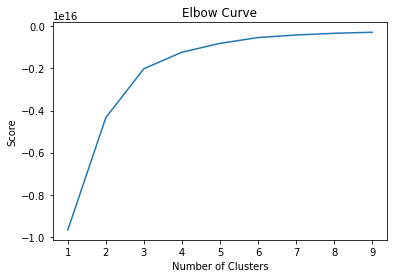

In [63]:
#Plot the elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve begins to flatten out 4 clusters. Due to the only slight increase from 3 to 4, either 3 or 4 clusters could be used. 

## K-Means Clustering

In [64]:
#create k-means object
kmeans= KMeans(n_clusters= 4, n_jobs= -1)

In [65]:
#Fit k-means object to data
kmeans.fit(df_numbers)

C:\Users\liz20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [66]:
df_numbers['clusters']= kmeans.fit_predict(df_numbers)

C:\Users\liz20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [67]:
df_numbers.head()

,County_id,Total_Population,Pop_Density,Land_Area,Total_Households,Low_Income(<50000),Average_Income(50k-100k),High_Income(100k+),White_only,Black_only,...,Non-Hispanic,Hispanic,Total_Deaths,Total_Cases,People_of_Color,POC%,H%,LI%,HI%,clusters
0,0.0,3809.0,1.823648,2088.670821,1585.0,832.0,554.0,199.0,3546.0,1.0,...,3745.0,64.0,100.0,5531.0,263.0,6.9,1.680231,52.5,12.6,0
1,1.0,7576.0,2.136633,3545.766247,3097.0,1821.0,823.0,453.0,5755.0,11.0,...,7229.0,347.0,39.0,5529.0,1821.0,24.0,4.580253,58.8,14.6,0
2,2.0,44214.0,11.089515,3987.009440,17433.0,8856.0,5653.0,2924.0,39263.0,205.0,...,42610.0,1604.0,614.0,39859.0,4951.0,11.2,3.627810,50.8,16.8,0
3,3.0,41638.0,4.912973,8475.112760,17527.0,9698.0,5215.0,2614.0,30423.0,204.0,...,33427.0,8211.0,1351.0,156468.0,11215.0,26.9,19.719967,55.3,14.9,0
4,4.0,13219.0,5.866061,2253.471152,5782.0,2980.0,1852.0,950.0,11881.0,30.0,...,12736.0,483.0,74.0,16541.0,1338.0,10.1,3.653832,51.5,16.4,0


In [68]:
df_numbers['clusters'].value_counts()

0    2954
3     150
2      23
1       5
Name: clusters, dtype: int64

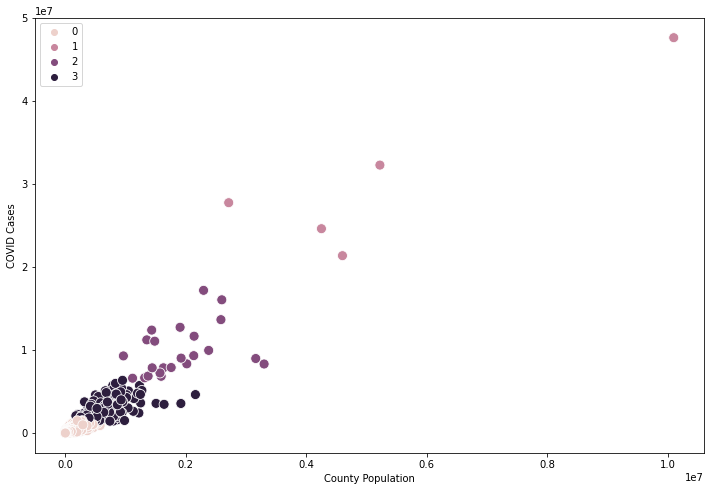

In [69]:
#Plot the clusters for the "Population" and "Total_Cases"
plt.figure(figsize=(12,8))
ax= sns.scatterplot(x=df_numbers['Total_Population'], y=df_numbers['Total_Cases'], hue= kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('County Population')
plt.ylabel('COVID Cases')
plt.show()

Since we saw in the last exercise that these two variables have a high correlation, the clusters are broken up into counties with low population and low cases, medium population and medium cases, high population and high cases, and extreme values og high/very high population and and extremely high cases numbers.

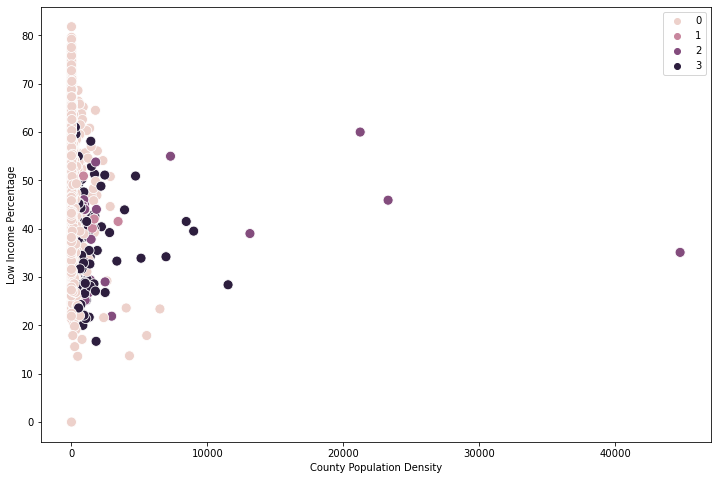

In [81]:
#Plot the clusters for the "Population" and "Total_Cases"
plt.figure(figsize=(12,8))
ax= sns.scatterplot(x=df_numbers['Pop_Density'], y=df_numbers['LI%'], hue= kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('County Population Density')
plt.ylabel('Low Income Percentage')
plt.show()

Inerestingly, this scatterplot has clusters that are not in clearly defined sections and overlap one another. The light pink cluster also contains the highest rates of low income which coincide with smaller population densities.
It seems that the relationship between population density and low income percentage does very little to explain the relationship between the other variables.

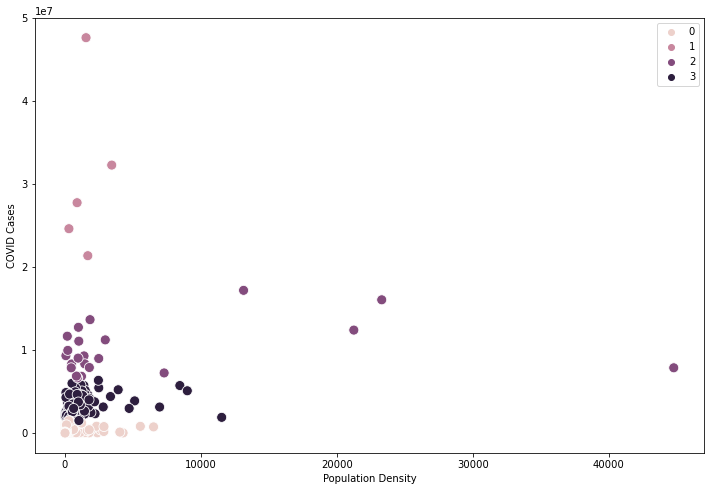

In [70]:
#Plot the clusters for the "Pop_Density" and "Total_Cases"
plt.figure(figsize=(12,8))
ax= sns.scatterplot(x=df_numbers['Pop_Density'], y=df_numbers['Total_Cases'], hue= kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Population Density')
plt.ylabel('COVID Cases')
plt.show()

Cluster 0 contains counties that have very low case numbers and low-medium population density. 
Cluster 3 contains counties with higher case numbers and similar, but slightly higher population density.
Cluster 2 contains counties with high case numbers and very high population density.
Cluster 1 contains counties with very high case numbers.

In [82]:
df_numbers.loc[df_numbers['clusters']==3, 'cluster'] = 'dark purple'
df_numbers.loc[df_numbers['clusters']==2, 'cluster'] = 'purple'
df_numbers.loc[df_numbers['clusters']==1, 'cluster'] = 'pink'
df_numbers.loc[df_numbers['clusters']==0, 'cluster'] = 'light pink'

In [83]:
df_numbers.groupby('cluster').agg({'Pop_Density':['mean', 'median'],
                          'Total_Cases':['mean', 'median'],
                            'Total_Population':['mean', 'median'],
                          'LI%':['mean', 'median']})

Pop_Density                Total_Cases              \
                    mean       median          mean      median   
cluster                                                           
dark purple  1049.967636   639.731600  2.986067e+06   2613452.0   
light pink     77.460308    25.398248  1.767398e+05     77397.5   
pink         1566.537645  1545.990303  3.073100e+07  27752402.0   
purple       5647.778652  1211.955485  9.871940e+06   9026035.0   

            Total_Population                   LI%         
                        mean     median       mean median  
cluster                                                    
dark purple     6.876767e+05   639726.0  39.233333   39.5  
light pink      5.040537e+04    23530.0  50.374611   50.7  
pink            5.378745e+06  4602523.0  43.020000   41.5  
purple          1.893521e+06  1761382.0  39.886957   41.8

The light pink cluster with the lowest population density also has the highest low-income percentage.
The pink cluster has the highet number of cases with only the second highest values of population density and low-income rate. This indicates that here is some correlation between cases, population density and low-income rate; albeit a weaker correlation than cases and population, naturally.